# Loss-function optimality – Decision Theory

## Decision Theory (loss-function optimality)

- "Best" point estimators
- "Best" hypothesis testing procedure
- MSE is a special case of a *loss function*
- After we observe data $X=x$ a decision has to be made about $\theta$
- Decision theory: Take into account the losses that can occur when making a decision about $\theta$

## Decision Theory
- Sample space $S$: Set of all possible samples (observations)
    - We observe $\mathbf{X}=\mathbf{x}$ where $\mathbf{x}\in S$
- Parameter space $\Theta$: Set of possible values for the unknown parameters $\theta$.
    - The unknown *true* value of the parameter is in $\Theta$
    - Sometimes called *states of nature*
- Action space $\mathcal{A}$: The set of all possible actions the statistician can take.
    - Also called *decision space* and *decisions*
    - Sometimes $\mathcal{A}=\Theta$
- Action rule is a function $\delta$ from $S$ into $\mathcal{A}$.
    - The action we take depends on the action rule: $a = \delta(x)$
    - The action rule is usually some statistical procedure and $\delta$ can be a statistic

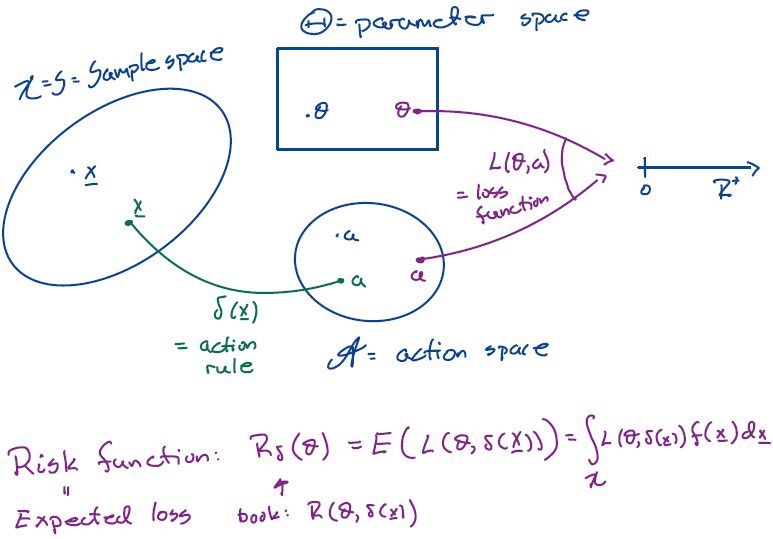

In [1]:
from IPython.display import Image
Image(filename="Images\\Decision_Theory.png")

## Point estimation as a decision problem
- Sample space $S$: Set of all possible samples
    - We obeserve $\mathbf{X}=\mathbf{x}$ where $\mathbf{x}\in S$
- States of nature $\Theta$: Parameter space
    - Set of all possible values of the true value of the parameter $\theta$
- Action space: Here we have $\mathcal{A}=\Theta$
    - Action: the estimate we come up with for $\theta$
- Action rule: Point estimator, e.g. $\delta(\mathbf{x})=\bar{x}$

## Hypothesis testing as a decision problem
- Sample space $S$: Set of all possible samples
    - We observe $\mathbf{X}=\mathbf{x}$ where $\mathbf{x}\in S$
- States of nature $\Theta$: Parameter space
    - Set of all possible values of the true value of the parameter $\theta$
- Action space: {$a_0,a_1$}={don't reject $H_0$, reject $H_0$}
    - Action: we choose between $H_0:\theta\in\Theta_0$ and $H_1:\theta\in\Theta_0^c$
- Action rule: decision rule
    - e.g. choose $H_1$ if $\mathbf{x}\in R$ and choose $H_0$ if $\mathbf{x}\in R^c$

        $\delta(\mathbf{x})=\left\{
        \begin{array}
        {ll}\mathrm{reject}~H_0 & \mathrm{if~}\mathbf{x}\in R \\
        \text{don't reject}~H_0 & \mathrm{if~}\mathbf{x}\notin R
        \end{array}\right.$

## Loss functions for point estimation

$S$: Sample space $\Theta$: Parameter space $\mathcal{A}$: Action space
- Loss function $L:\Theta\times\mathcal{A}\to\mathbb{R^+}$
    - $L(\theta,a)=$ The loss when the true value of the parameter is $\theta$ and action $a$ is taken
- Examples of loss functions in point estimation problems:
- Suqared error loss:

    $L(\theta,a)=(\theta-a)^2$
- Absolute error loss:

    $L(\theta,a)=|\theta-a|$

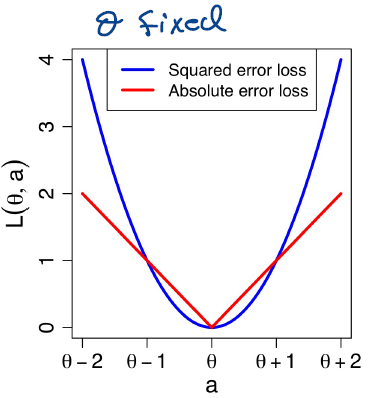

In [2]:
from IPython.display import Image
Image(filename="Images\\loss_functions.png")

## Risk function (Frequentist)
- The loss function depends on the sample through the action rule:

    $L(\theta,a)=L(\theta,\delta(\mathbf{x}))$
- Risk function of a statistical procedure $\delta(\mathbf{X})$ is the expected loss:

    $R(\theta,\delta)=E_{\mathbf{x}|\theta}(L(\theta,\delta(\mathbf{x})))=\int L(\theta,\delta(\mathbf{x}))f(\mathbf{x}|\theta)d\mathbf{x}$

    - $\theta$ is fixed and the distribution of $\mathbf{x}$ depends on $\theta$ (the reason why choose $f(\mathbf{x}|\theta)$
- Goal: To find a statistical procedure with minimum risk
    - Complicated by the fact that $R(\theta,\delta)$ usually depends on $\theta$ (the actual state of nature)
    - Ideally our estimator has smallest risk for all $\theta$

## Risk functions for point estimation
- For squared error loss the risk is the mean squared error:

    $R(\theta,\delta)=E((\delta(\mathbf{X})-\theta)^2)=Var(\delta(\mathbf{X}))+bias(\delta(\mathbf{X}))^2$
- For absolute error loss the risk is 

    $R(\theta,\delta)=E(|\delta(\mathbf{X})-\theta|)$

Therefore, minimizing MSE for a point estimation is the same as minimizing risk under squared error loss.

### Example
- $X_1,...,X_n$ iid $N(\mu,\sigma^2)$
- Consider squared error loss and three estimators for $\sigma^2$

    $S^2\quad\hat{\sigma}^2=\frac{n-1}{n}S^2\quad \tilde{S}^2=\frac{n-1}{n+1}S^2$

    Recall: $S^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X})^2$

    For a normal distribution:

    $E(S^2)=\sigma^2$ and $Var(S^2)=\frac{2\sigma^4}{n-1}$

    Let set $b$ as the coefficient of $S^2$

    $\begin{aligned}
    MSE(bS^2)
    &=Var(bS^2)+bias(bS^2)^2 \\
    &=b^2\cdot\frac{2\sigma^4}{n-1}+(b\sigma^2-\sigma^2)^2 \\
    &=(\frac{2b^2}{n-1}+(b-1)^2)\sigma^4
    \end{aligned}$

    1. $S^2: R(\theta,S^2)=\frac{2}{n-1}\sigma^4\quad (b=1)$

    2. $\hat{\sigma}^2: R(\theta,\frac{n-1}{n}S^2)=\frac{2n-1}{n^2}\sigma^4\quad(b=\frac{n-1}{n})$

    3. $\tilde{S}^2: R(\theta,\frac{n-1}{n+1}S^2)=\frac{2}{n+1}\sigma^4\quad (b=\frac{n-1}{n+1})$
- Find a $b$ to minimize the $MSE(bS^2)$:

    $\frac{d}{db}(\frac{2b^2}{n-1}+(b-1)^2)\sigma^4=0$

    $\Rightarrow (\frac{4b}{n-1}+2(b-1))\sigma^4=0$

    $b=\frac{n-1}{n+1}$

    Check the second derivative > 0

    $\Rightarrow \tilde{S}^2$ is the best estimator of $\sigma^2$ of the form $bS^2$ under squared error loss.

## Bayes risk
- Risk is usually a function of $\theta$
- Perhaps we care more about some values of $\theta$ than others
    - Expressed via the prior distribution on $\theta:\pi(\theta)$
- Bayes risk is defined as

    $E_\theta(R(\theta,\delta))=\int_{\Theta}R(\theta,\delta)\pi(\theta)d\theta$

    Gives *one number* for each action rule, so easier to compare

## Bayes risk and Posterior expected loss
- We can (for most distributions) switch the order of integration:

    $\begin{aligned}
    E_\theta(R(\theta,\delta))
    &=\int_{\Theta}R(\theta,\delta)\pi(\theta)d\theta \\
    &=\int_{\Theta}(\int_{\mathcal{X}}L(\theta,\delta(\mathbf{x}))f(\mathbf{x}|\theta)d\mathbf{x})\cdot\pi(\theta)d\theta \\
    &=\int_{\Theta}(\int_{\mathcal{X}}L(\theta,\delta(\mathbf{x}))f(\mathbf{x}|\theta)\pi(\theta)d\mathbf{x})d\theta\\
    &=\int_{\Theta}(\int_{\mathcal{X}}L(\theta,\delta(\mathbf{x}))f(\theta|\mathbf{x})m(\mathbf{x})d\mathbf{x})d\theta \\
    &=\int_{\mathcal{X}}\big(\int_{\Theta}L(\theta,\delta(\mathbf{x}))f(\theta|\mathbf{x})d\theta\big)m(\mathbf{x})d\mathbf{x}
    \end{aligned}$

    **Posterior expected loss**: $\int_{\Theta}L(\theta,\delta(\mathbf{x}))f(\theta|\mathbf{x})d\theta$

## Posterior expected loss
- Posterior expected loss is defined as 

    $\int_{\Theta}L(\theta,\delta(\mathbf{x}))f(\theta|\mathbf{x})d\theta$
- Bayes rule = the action rule that minimizes the posterior expected loss for any observed sample $\mathbf{x}$
- For squared error loss we get

    $\int_{\Theta}(\theta-\delta(\mathbf{x}))^2\pi(\theta|\mathbf{x})d\theta = E_{\theta|\mathbf{x}}((\theta-\delta(\mathbf{x}))^2|\mathbf{X}=\mathbf{x})$

    Bayes rule: $E(\theta|\mathbf{x})=$ posterior mean

    - This is the reason why we call posterior mean as the Bayes Estimator
- Bayes rule for absolute error loss is the posterior median

Therefore, for the Bayes Rule, the point is: If we can find the $\delta$ with the smallest posterior expected loss for all $\mathbf{x}\in\mathcal{X}$, then we have found the delta $\delta$ with smallest Bayes-Risk.

In general, let $Y$ be a random variable.
- The constant $c$ that minimizes $E((Y-c)^2)$ is $c=E(Y)$
- The constant $c$ that minimizes $E(|Y-c|)$ is $c=median(Y)$

Note: we get a much more general results for point estimation in Bayesian inference than Frenquentist.
- Under Squared Error Loss, posterior mean is the best estimator.
- Under Absolute Error Loss, posterior median is the best estimator.


## Loss functions for hypothesis testing

$S$: Sample Space $\quad\Theta$: Parameter space $\quad\mathcal{A}$: Action space = {$a_0,a_1$}
- Loss function $L:\Theta\times\mathcal{A}\to\mathcal{R}^+$
    - $L(\theta,a)=$ The loss when the state of nature is $\theta$ and action $a$ is taken
- In hypothesis testing there are only 2 possible actions and 2 relevant states of nature

    $\delta(\mathbf{x})=
    \begin{cases}
    a_{1},\quad\text{if }\mathbf{x}\in R \\
    a_{0},\quad\text{if }\mathbf{x}\notin R & 
    \end{cases}$

|                | $\theta \in \Theta_0$ | $\theta \in \Theta_0^c$ |
|----------------|-----------------------|-------------------------|
| $a_0$: choose $H_0$ |                       | Type II error      |
| $a_1$: choose $H_1$ | Type I error          |                    |

## Loss fuctions for hypothesis testing
- 0-1 loss:

    $L(\theta,a_{0})=
    \begin{cases}
    0 & \mathrm{if~}\theta\in\Theta_{0} \\
    1 & \mathrm{if~}\theta\in\Theta_{0}^{c}
    \end{cases}\quad$ and 
    $\quad L(\theta,a_{1})=
    \begin{cases}
    1 & \mathrm{if~}\theta\in\Theta_{0} \\
    0 & \mathrm{if~}\theta\in\Theta_{0}^{c}
    \end{cases}$

| $L(\theta, a_i)$ | $\theta \in \Theta_0$ | $\theta \in \Theta_0^c$ |
|---------------|------------------|--------------------|
| $a_0$           | $0$                | $1$                |
| $a_1$           | $1$              | $0$                  |

$
L(\theta, a) = 
\begin{cases} 
0, & \text{if } (a = a_0 \text{ and } \theta \in \Theta_0) \text{ or } (a = a_1 \text{ and } \theta \in \Theta_0^c) \\
1, & \text{if } (a = a_0 \text{ and } \theta \in \Theta_0^c) \text{ or } (a = a_1 \text{ and } \theta \in \Theta_0)
\end{cases}
$

- Generalized 0-1 loss:

$
L(\theta, a_0) = 
\begin{cases} 
0, & \text{if } \theta \in \Theta_0 \\
c_2, & \text{if } \theta \in \Theta_0^c 
\end{cases}
\quad \text{and} \quad
L(\theta, a_1) = 
\begin{cases} 
c_1, & \text{if } \theta \in \Theta_0 \\
0, & \text{if } \theta \in \Theta_0^c 
\end{cases}
$

## Risk function for hypothesis tests
- Under the generalized 0-1 loss, the risk function is closely related to the power function
- Action rule:

    $L(\theta,a_{0})=
    \begin{cases}
    0 & \mathrm{if~}\theta\in\Theta_{0} \\
    c_{2} & \mathrm{if~}\theta\in\Theta_{0}^{c}
    \end{cases}\quad$ and 
    $\quad L(\theta,a_{1})=
    \begin{cases}
    c_{1} & \mathrm{if~}\theta\in\Theta_{0} \\
    0 & \mathrm{if~}\theta\in\Theta_{0}^{c}
    \end{cases}$

| $L(\theta, a_i)$ | $\theta \in \Theta_0$ | $\theta \in \Theta_0^c$ |
|---------------|------------------|--------------------|
| $a_0$           | $0$                | $c_1$                |
| $a_1$           | $c_2$              | $0$                  |

$
L(\theta, a) = 
\begin{cases} 
0, & \text{if } (a = a_0 \text{ and } \theta \in \Theta_0) \text{ and } (a = a_1 \text{ and } \theta \in \Theta_0^c) \\
c_1, & \text{if } a = a_0 \text{ and } \theta \in \Theta_0^c \\
c_2, & \text{if } a = a_1 \text{ and } \theta \in \Theta_0
\end{cases}
$

## Risk function for hypothesis tests
- Under the generalized 0-1 loss, the risk function is closely related to the power function

    $\delta(\mathbf{x})=
    \begin{cases}
    a_{1},\quad\text{if }\mathbf{x}\in R \\
    a_{0},\quad\text{if }\mathbf{x}\notin R & 
    \end{cases}$
- Risk function:

    $\begin{aligned}
    R_\delta(\theta) 
    &= E_\theta \left( L(\theta, \delta(\mathbf{x})) \right) \\
    &= 0 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = 0) + c_1 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = c_1) + c_2 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = c_2) \\
    &= c_1 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = c_1) + c_2 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = c_2)
    \end{aligned}$

    For $\theta\in\Theta_0^c:$

    $\begin{aligned}
    R_\delta(\theta) 
    &= c_1 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = c_1) + c_2 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = c_2) \\
    &= c_1 \cdot P_\theta(\delta(\mathbf{x}) = a_0) \\
    &= c_1 \cdot P(\text{don't reject}) \\
    &= c_1 \cdot (1 - P(\text{reject})) \\
    &= c_1 (1-\beta(\theta))
    \end{aligned}$

    For $\theta\in\Theta_0$

    $\begin{aligned}
    R_\delta(\theta) 
    &= c_1 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = c_1) + c_2 \cdot P_\theta(L(\theta, \delta(\mathbf{x})) = c_2) \\
    &= c_2 \cdot P_\theta(\delta(\mathbf{x}) = a_1) \\
    &= c_2 \cdot P(\text{reject}) \\
    &= c_2 \beta(\theta)
    \end{aligned}$

    Minimizing risk w.r.t 0-1 loss is equivalent to minimizing probabilities of Type I and Type II errors

    i.e. setting significant level low and find the most powerful test

    Generalized 0-1 loss: can weigh the importance of Type I and Type II errors differently.
    

### Example
- $X\sim Binomial(5,p).$ Want to test $H_0:p\leq 1/3$ v.s. $H_1: p>1/3$, using 0-1 loss ($c_1=c_2=1$)
- Compare Risk function for two test procedures:
    - $\delta_1$ rejects if $X=0$ or $X=1$
    - $\delta_2$ rejects if $X=4$ or $X=5$

    Risk function for $\delta_1:$

    - For $p\leq 1/3~(\theta\in\Theta_0):$

        $\begin{aligned}
        R_{\delta_1}(p)
        &=\beta(\theta)=P(\text{reject})\\
        &=P(X=0\text{ or }X=1)\\
        &=\binom{5}{0} p^0(1-p)^5 + \binom{5}{1} p^1(1-p)^4 
        \end{aligned}$ 
    - For $p > 1/3~(\theta\in\Theta_0^c):$

        $\begin{aligned}
        R_{\delta_1}(p)
        &=1-\beta(\theta)=1-P(\text{reject}) \\
        &=1 - \binom{5}{0} p^0(1-p)^5 - \binom{5}{1} p^1(1-p)^4
        \end{aligned}$ 

    Risk function for $\delta_2:$

    - For $p\leq 1/3~(\theta\in\Theta_0):$

        $\begin{aligned}
        R_{\delta_2}(p)
        &=\beta(\theta)=P(\text{reject})\\
        &=P(X=4\text{ or }X=5)\\
        &=\binom{5}{4} p^4(1-p)^1 + \binom{5}{5} p^5(1-p)^0 
        \end{aligned}$ 
    - For $p > 1/3~(\theta\in\Theta_0^c):$

        $\begin{aligned}
        R_{\delta_1}(p)
        &=1-\beta(\theta)=1-P(\text{reject}) \\
        &=1 - \binom{5}{4} p^4(1-p)^1 - \binom{5}{5} p^5(1-p)^0 
        \end{aligned}$ 

    

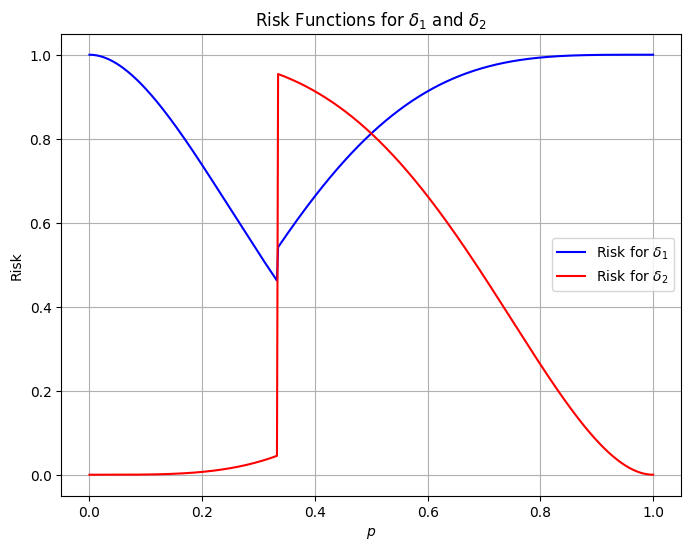

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define p values from 0 to 1
p = np.linspace(0, 1, 500)

# Risk function for delta_1
reject_prob_delta1 = (1 - p)**5 + 5 * p * (1 - p)**4
risk_delta1 = np.where(p <= 1/3, reject_prob_delta1, 1 - reject_prob_delta1)

# Risk function for delta_2
reject_prob_delta2 = 5 * p**4 * (1 - p) + p**5
risk_delta2 = np.where(p <= 1/3, reject_prob_delta2, 1 - reject_prob_delta2)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(p, risk_delta1, label=r'Risk for $\delta_1$', color='blue')
plt.plot(p, risk_delta2, label=r'Risk for $\delta_2$', color='red')
plt.xlabel(r'$p$')
plt.ylabel('Risk')
plt.title(r'Risk Functions for $\delta_1$ and $\delta_2$')
plt.legend()
plt.grid(True)
plt.show()


Neither test is uniformly better.
- $\delta_1$ performs better for $p\in(\frac{1}{3},\frac{1}{2})$
- $\delta_2$ performs better otherwise


### Example - Risk functions
- $X\sim N(\theta,1)$, want to test $H_0:\theta\geq\theta_0$ versus $H_1:\theta<\theta_0$, using the following loss function:

    $\left.L(\theta,a_0)=\left\{
    \begin{array}
    {ll}0 & \mathrm{if~}\theta\geq\theta_0 \\
    b(\theta_0-\theta) & \mathrm{if~}\theta<\theta_0
    \end{array}\right.\right.
    $

    
    $L(\theta,a_1)=\left\{
    \begin{array}
    {ll}c(\theta_0-\theta)^2 & \mathrm{if~}\theta\geq\theta_0 \\
    0 & \mathrm{if~}\theta<\theta_0
    \end{array}\right.$
- Test procedures: Reject if $X<-z_\alpha+\theta_0$ for $\alpha=0.1,0.3,0.5$
- Find the risk function and compare

    $c_2 = c(\theta_0-\theta)^2$

    $c_1 = b(\theta_0-\theta)$

    Risk function:

    - For $\theta\geq\Theta_0~\theta\in\Theta_0:$

        $\begin{aligned}
            R_{\delta}(\theta)
            &=c_2 P(\text{reject}) \\
            &=c(\theta_0-\theta)^2 P(X<-z_\alpha+\theta_0) \\
            &=c(\theta_0-\theta)^2 \Phi(-z_\alpha+\theta_0-\theta)
        \end{aligned}$
    - For $\theta<\Theta_0~\theta\in\Theta_0^c:$

        $\begin{aligned}
            R_{\delta}(\theta)
            &=c_1(1-P(\text{reject})) \\
            &=b(\theta_0-\theta) (1-\Phi(-z_\alpha+\theta_0-\theta))
        \end{aligned}$

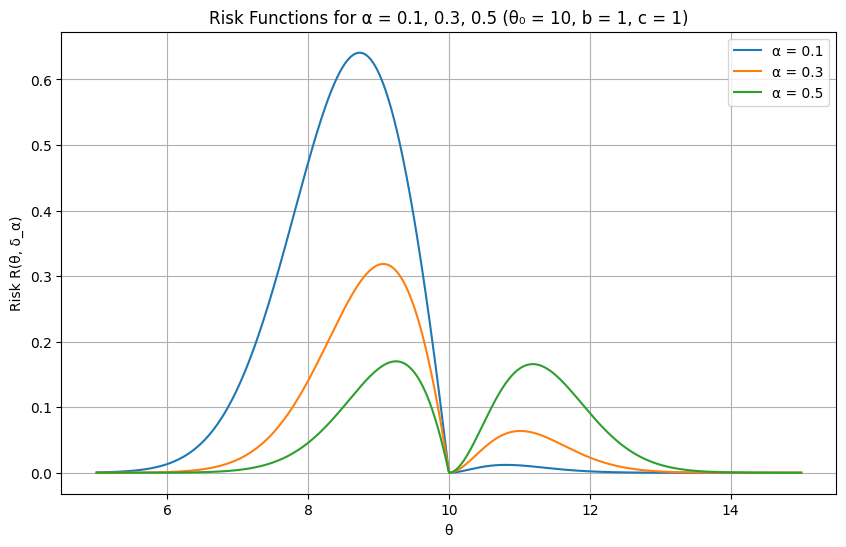

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
theta_0 = 10
b = 1
c = 1
alpha_values = [0.1, 0.3, 0.5]
z_alpha = [norm.ppf(1 - alpha) for alpha in alpha_values]  # z_alpha values

# Risk function
def risk_function(theta, z_alpha, theta_0=10, b=1, c=1):
    if theta >= theta_0:
        return c * (theta - theta_0)**2 * norm.cdf(-(theta - theta_0 + z_alpha))
    else:
        return b * (theta_0 - theta) * (1 - norm.cdf(theta_0 - theta - z_alpha))

# Vectorize the risk function for plotting
risk_vectorized = np.vectorize(risk_function, excluded=['z_alpha', 'theta_0', 'b', 'c'])

# Theta values for plotting
theta = np.linspace(5, 15, 1000)

# Compute risk for each alpha
risks = {}
for alpha, z in zip(alpha_values, z_alpha):
    risks[alpha] = risk_vectorized(theta, z_alpha=z, theta_0=theta_0, b=b, c=c)

# Plotting
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    plt.plot(theta, risks[alpha], label=f'α = {alpha}')
plt.xlabel('θ')
plt.ylabel('Risk R(θ, δ_α)')
plt.title('Risk Functions for α = 0.1, 0.3, 0.5 (θ₀ = 10, b = 1, c = 1)')
plt.legend()
plt.grid(True)
plt.show()

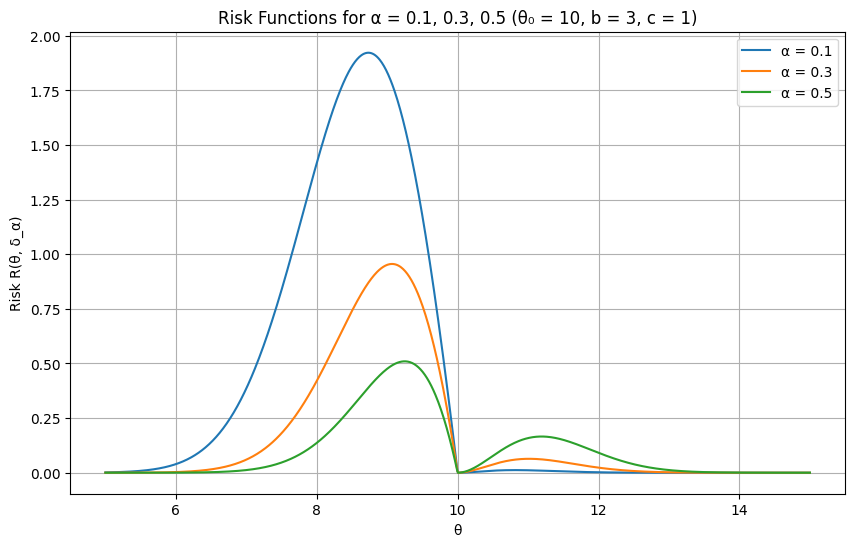

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
theta_0 = 10
b = 3
c = 1
alpha_values = [0.1, 0.3, 0.5]
z_alpha = [norm.ppf(1 - alpha) for alpha in alpha_values]  # z_alpha values

# Risk function
def risk_function(theta, z_alpha, theta_0=10, b=1, c=1):
    if theta >= theta_0:
        return c * (theta - theta_0)**2 * norm.cdf(-(theta - theta_0 + z_alpha))
    else:
        return b * (theta_0 - theta) * (1 - norm.cdf(theta_0 - theta - z_alpha))

# Vectorize the risk function for plotting
risk_vectorized = np.vectorize(risk_function, excluded=['z_alpha', 'theta_0', 'b', 'c'])

# Theta values for plotting
theta = np.linspace(5, 15, 1000)

# Compute risk for each alpha
risks = {}
for alpha, z in zip(alpha_values, z_alpha):
    risks[alpha] = risk_vectorized(theta, z_alpha=z, theta_0=theta_0, b=b, c=c)

# Plotting
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    plt.plot(theta, risks[alpha], label=f'α = {alpha}')
plt.xlabel('θ')
plt.ylabel('Risk R(θ, δ_α)')
plt.title('Risk Functions for α = 0.1, 0.3, 0.5 (θ₀ = 10, b = 3, c = 1)')
plt.legend()
plt.grid(True)
plt.show()

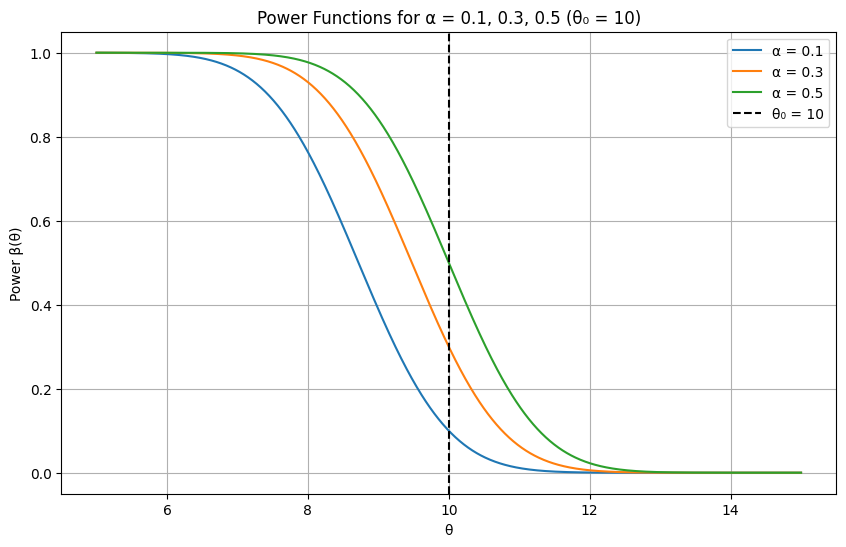

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
theta_0 = 10
alpha_values = [0.1, 0.3, 0.5]
z_alpha = [norm.ppf(1 - alpha) for alpha in alpha_values]  # z_alpha values

# Power function
def power_function(theta, z_alpha, theta_0=10):
    return norm.cdf(-z_alpha + theta_0 - theta)

# Theta values for plotting
theta = np.linspace(5, 15, 1000)

# Compute power for each alpha
powers = {}
for alpha, z in zip(alpha_values, z_alpha):
    powers[alpha] = power_function(theta, z, theta_0)

# Plotting
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    plt.plot(theta, powers[alpha], label=f'α = {alpha}')
plt.axvline(x=theta_0, color='k', linestyle='--', label='θ₀ = 10')
plt.xlabel('θ')
plt.ylabel('Power β(θ)')
plt.title('Power Functions for α = 0.1, 0.3, 0.5 (θ₀ = 10)')
plt.legend()
plt.grid(True)
plt.savefig('power_functions.png')

Point: When comparing tests we rely on the power function.

Risk function is a combination of the power function and loss function.